In [24]:
import os
import pandas as pd
from process_data import load_processed_affinity_data, plot_affinity_by_edit_distance

In [25]:
root_dir = os.path.abspath("")
save_data_dir = os.path.join(root_dir, "processed_data")

In [26]:
ab = "9114"  # 6261 | 9114

In [27]:
df = load_processed_affinity_data(ab)
df.to_csv(os.path.join(save_data_dir, f"{ab}_affinities.csv"), index=False)
df

,binary_id,str_aa_id,edit_distance,H_seq,h1_mean,h3_mean,fluB_mean
0,1001110010000101,SSSSSTNTISTSSTYS,9,QVQLVQSGAEVKKPGSSVKVSCKASGGTSSSYAISWVRQAPGQGLE...,9.484586,6.000000,6.0
1,0001111110011011,FSSSSTASISTNNRFS,6,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,9.430991,6.000000,6.0
2,1111110010011111,SNNSSTNTISTNNTFS,4,QVQLVQSGAEVKKPGSSVKVSCKASGGTSNNYAISWVRQAPGQGLE...,9.497006,6.736213,6.0
3,1011111110101110,SSNSSTASISSSNTFY,4,QVQLVQSGAEVKKPGSSVKVSCKASGGTSSNYAISWVRQAPGQGLE...,9.499691,6.000000,6.0
4,1111101010000111,SNNSSAATISTSSTFS,6,QVQLVQSGAEVKKPGSSVKVSCKASGGTSNNYAISWVRQAPGQGLE...,9.380737,6.000000,6.0
...,...,...,...,...,...,...,...
65531,0000100010110100,FSSISANTISSNSTYY,11,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,NaN,6.000000,6.0
65532,0010100000110110,FSNISANTKSSNSTFY,10,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSNYAISWVRQAPGQGLE...,NaN,6.000000,6.0
65533,0010100010111000,FSNISANTISSNNRYY,10,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSNYAISWVRQAPGQGLE...,NaN,6.000000,6.0
65534,0010100110001000,FSNISANSISTSNRYY,11,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSNYAISWVRQAPGQGLE...,NaN,6.000000,6.0


In [29]:
# check the proportion binding against paper values

ag = "h1"  # h1, h3, h9, fluB
lower_limit = 7

print(f"Total df size for {ab} and {ag}: \t\t\t\t\t\t{df.shape[0]:,}")

lower_limit_df = df[df[f"{ag}_mean"]==lower_limit]
print(f"Number of affinities for {ab} and {ag} equal to lower limit: \t\t{lower_limit_df.shape[0]:,}")

not_null_df = df[~(df[f"{ag}_mean"].isnull())]
print(f"Number of non-null affinities for {ab} and {ag}: \t\t\t\t{not_null_df.shape[0]:,}")

binders_df = not_null_df[not_null_df[f"{ag}_mean"]>lower_limit]
print(f"Number of non-null affinities for {ab} and {ag} greater than lower limit: {binders_df.shape[0]:,}")

proportion = binders_df.shape[0]/df.shape[0]
print(f"\nProportion binding (not null and above lower limit) for {ab} and {ag}: {100*proportion:.1f}%")

Total df size for 9114 and h1: 						65,536
Number of affinities for 9114 and h1 equal to lower limit: 		1,675
Number of non-null affinities for 9114 and h1: 				65,094
Number of non-null affinities for 9114 and h1 greater than lower limit: 63,419

Proportion binding (not null and above lower limit) for 9114 and h1: 96.8%


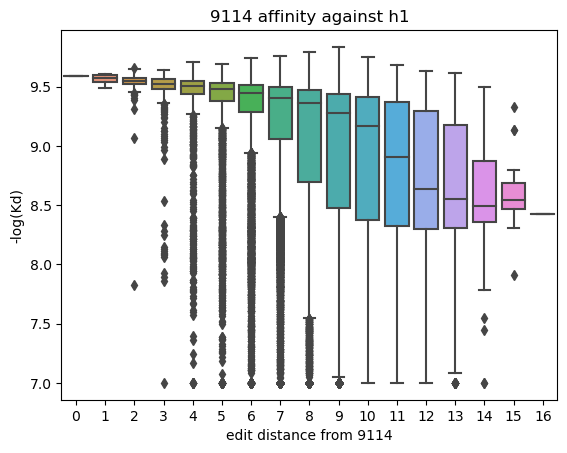

In [32]:
plot_affinity_by_edit_distance(ab, df, target=ag)